<a href="https://colab.research.google.com/github/tackulus/229351/blob/main/610510531_LAB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นเลือก File -> Download .ipynb

In [1]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# StatsModels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Download the file
!wget -O Auto.csv http://www.donlapark.cmustat.com/229351/data/Auto.csv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--2021-01-21 04:23:27--  http://www.donlapark.cmustat.com/229351/data/Auto.csv
Resolving www.donlapark.cmustat.com (www.donlapark.cmustat.com)... 150.107.31.67
Connecting to www.donlapark.cmustat.com (www.donlapark.cmustat.com)|150.107.31.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18079 (18K) [text/csv]
Saving to: ‘Auto.csv’

Auto.csv            100%[===================>]  17.66K  78.7KB/s    in 0.2s    

2021-01-21 04:23:28 (78.7 KB/s) - ‘Auto.csv’ saved [18079/18079]



In [2]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
auto = pd.read_csv('Auto.csv',na_values=["?"])

# ลบแถวที่มี missing values
auto = auto.dropna()

auto = auto.drop(['name', 'origin'],axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [3]:
#syntax is ols(formula, dataset)
model = smf.ols('mpg ~ cylinders + displacement + \
                      horsepower + weight + \
                      acceleration+year', auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          3.79e-135
Time:                        04:23:36   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.5353      4.764     -3.051   

ตัวแปรตาม ($y$) และค่าทำนาย ($\hat y$)

In [4]:
y = auto['mpg']

y_pred = model.predict(results.params)

###$F$-statistic

คำนวณ $F$-statistic ด้วย
$$F_{p,n-p-1} = \frac{(\text{TSS}-\text{RSS})/p}{\text{RSS}/(n-p-1)}$$

โดยที่

$$
 \text{TSS} = \sum_{i=1}^n (y_i-\bar{y})^2 
$$

$$
 \text{RSS} = \sum_{i=1}^n (y_i-\hat{y})^2 
$$


In [7]:
len(results.params)

7

In [8]:
#TODO: compute F-statistic

n = len(y)

p = len(results.params) - 1

TSS = np.sum( np.square(y - y.mean()) )

RSS = np.sum( np.square(y - y_pred) )

F = ((TSS-RSS)/p) / (RSS/(n-p-1))

#Compute p_value of the F-statistic

p_value = stats.f.sf(F, p, n-p-1)

print(p_value)

3.792336100722869e-135


###Exercise 1 : จากค่า p-value ที่ได้ข้างบน เราสามารถสรุปอะไรได้

คำตอบ : 

---



#Linear model diagnosis

In [9]:
# simple linear regression on Auto dataset
auto_lr = smf.ols('mpg ~ horsepower ', data=auto).fit()
print(auto_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           7.03e-81
Time:                        04:33:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

###คำนวณ Residuals $y_i-\hat{y}_i$

In [10]:
#Fitted values
auto_fitted = auto_lr.predict(auto)

#Residuals
auto_res = auto['mpg']-auto_fitted

print(auto_res)

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64


###1. ทดสอบ non-linearity

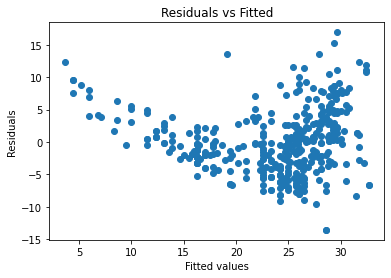

In [12]:
plt.scatter(auto_fitted, auto_res)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

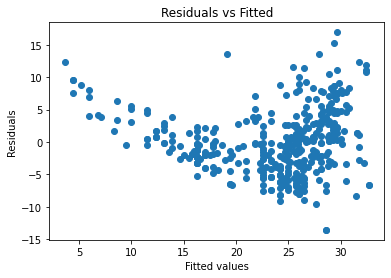

In [13]:
plt.scatter(auto_lr.fittedvalues, auto_lr.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

In [14]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           5.40e-99
Time:                        04:36:26   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

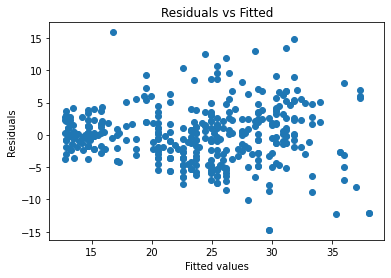

In [15]:
plt.scatter(auto_lr2.fittedvalues, auto_lr2.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

###2. ทดสอบ independence of errors
ตรวจสอบโดยการ plot time vs residuals (ถ้าสามารถทำได้)

###3. ทดสอบ constant variance

In [16]:
auto_lr2 = smf.ols('I(np.log(mpg)) ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:         I(np.log(mpg))   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          4.54e-112
Time:                        04:41:56   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4022      0

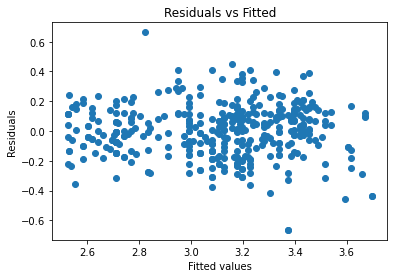

In [17]:
plt.scatter(auto_lr2.fittedvalues, auto_lr2.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

### 4., 5. หา outliers และ leverage points 

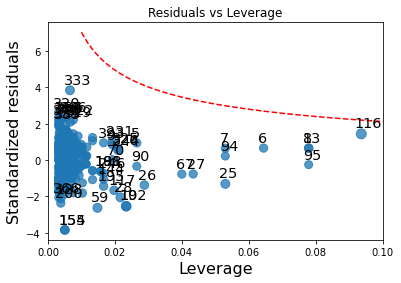

In [18]:
import statsmodels.graphics.api as smg

smg.influence_plot(auto_lr2, size=10)

#Cook's distance line ที่ระดับ 0.5
p = 1 # จำนวนตัวแปรต้น
x = np.linspace(0.01, 0.1, 50)
plt.plot(x, np.sqrt(0.5*p*(1 - x)/x), color='red', linestyle='dashed')

plt.xlim(0,0.1)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage');

###6. ทดสอบ multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

exog = auto_lr.model.exog
exog_names = auto_lr.model.exog_names

for i in range(1,len(exog_names)):
  print(exog_names[i],vif(exog,i))


horsepower 1.0


###Exercise 2

ดาวน์โหลดข้อมูลการขายเบาะรถยนต์ใน link โดยรันโค้ดข้างล่างนี้


In [22]:
# Download the file
!wget -O Carseats.csv http://www.donlapark.cmustat.com/229351/data/Carseats.csv

--2021-01-21 04:59:01--  http://www.donlapark.cmustat.com/229351/data/Carseats.csv
Resolving www.donlapark.cmustat.com (www.donlapark.cmustat.com)... 150.107.31.67
Connecting to www.donlapark.cmustat.com (www.donlapark.cmustat.com)|150.107.31.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19044 (19K) [text/csv]
Saving to: ‘Carseats.csv’

Carseats.csv        100%[===================>]  18.60K  84.3KB/s    in 0.2s    

2021-01-21 04:59:02 (84.3 KB/s) - ‘Carseats.csv’ saved [19044/19044]




Sales

    Unit sales (in thousands) at each location
CompPrice

    Price charged by competitor at each location
Income

    Community income level (in thousands of dollars)
Advertising

    Local advertising budget for company at each location (in thousands of dollars)
Population

    Population size in region (in thousands)
Price

    Price company charges for car seats at each site
ShelveLoc

    A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age

    Average age of the local population
Education

    Education level at each location
Urban

    A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US

    A factor with levels No and Yes to indicate whether the store is in the US or not

In [23]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
carseats = pd.read_csv('Carseats.csv')

carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [27]:
exps = 'Sales ~ ' + '+'.join(carseats.columns.drop('Sales'))

### Bad = Intercept + other values
### Medium = Intercept + other values + ShelveLoc(Med)*1
### Good = Intercept + other values + ShelveLoc(Good)*1

###จงสร้าง residual plot และ influence plot แล้วตอบคำถามต่อไปนี้


In [28]:
#@title

cs_lr = smf.ols(exps, data=carseats).fit()
print(cs_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          1.60e-166
Time:                        05:05:27   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

---

1. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) กับชั้นที่มีคุณภาพต่ำ (ShelveLoc (Bad)) ต่างกันอย่างไร ต่างกันเท่าไหร่ 

    > เบาะรถที่วางบนชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) มียอดขายมากกว่าชั้นที่มีคุณภาพต่ำ (ShelveLoc (Bad)) อยู่ 1,956.7 ยูนิต

2. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพดี (ShelveLoc (Good)) กับชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) ต่างกันอย่างไร ต่างกันเท่าไหร่

    > เบาะรถที่วางบนชั้นที่มีคุณภาพดี (ShelveLoc (Good)) มียอดขายมากกว่าชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) อยู่ 2,893.5 ยูนิต

3. จงตรวจสอบว่าข้อมูลที่ใช้มีความเหมาะสมกับการสร้าง linear regression หรือไม่ โดยพิจารณาสิ่งต่างๆเหล่านี้พร้อมกับให้เหตุผล

    3.1 Non-linearity

    > จากกราฟ Residuals vs Fitted <br> ข้อมูลมีลักษณะเป็นเชิงเส้น เนื่องจาก residual มีลักษณะสุ่ม (ไม่มีรูปแบบให้คาดเดาตำแหน่งของจุด)
    
    3.2 Independence of errors

    > ไม่พิจารณาเนื่องจากข้อมูลไม่เป็น time-series
    
    3.3 Constant variance

    > จากกราฟ Residuals vs Fitted <br> ความแปรปรวนมีค่าคงที่ เนื่องจาก residual ไม่ขึ้นกับ fitted values
    
    3.4 Outliers  
    
    > จากกราฟ Residuals vs Leverage <br> ไม่มี outlier

    3.5 Leverage points  
    
    > จากกราฟ Residuals vs Leverage <br> ไม่มี leverage point

    3.6 Multicollinearity

    > จากตาราง VIF <br> ไม่มี multicollinearity เนื่องจาก VIF ของทุกตัวแปรมีค่าน้อยกว่า 5

        ดังนั้น ข้อมูลที่ใช้เหมาะสมต่อการสร้าง linear regression

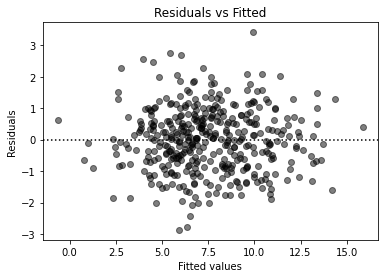

In [73]:
#@title

def ResidualPlot(modelfit):
    plt.scatter(modelfit.fittedvalues, modelfit.resid,
                alpha=0.5, color='#000000')
    plt.axhline(y=0, ls=':', c='#000000')
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()

ResidualPlot(cs_lr)

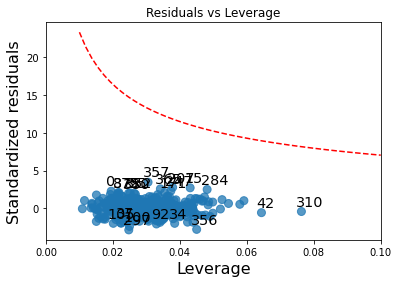

In [74]:
#@title

import statsmodels.graphics.api as smg

def LeveragePlot(modelfit, alpha=0.5):
    smg.influence_plot(modelfit, size=8)
    p = len(modelfit.params) - 1
    x = np.linspace(0.01, 0.1, 50)
    plt.plot(x, np.sqrt(alpha*p*(1 - x)/x), color='red', linestyle='dashed')
    plt.xlim(0,0.1)
    plt.xlabel('Leverage')
    plt.ylabel('Standardized residuals')
    plt.title('Residuals vs Leverage')

LeveragePlot(cs_lr)

In [76]:
#@title

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def MultiCollinearity(modelfit):
    exog = modelfit.model.exog
    exog_names = modelfit.model.exog_names
    df = pd.DataFrame({'VIF': [vif(exog, i) for i in range(1,len(exog_names))]},
                      index=exog_names[1:])
    return df

MultiCollinearity(cs_lr)

,VIF
ShelveLoc[T.Good],1.511411
ShelveLoc[T.Medium],1.517882
Urban[T.Yes],1.022705
US[T.Yes],1.980720
CompPrice,1.554618
Income,1.024731
Advertising,2.103136
Population,1.145534
Price,1.537068
Age,1.021051
